# Final Project - Insights Into 2016

The outcome of the 2016 presidential election caught a lot of people by surprise, probably no group more than Hillary's Clinton campaign team. That might seem like the understatement of the century, and perhaps we are ready to annoint that statement as such only seventeen years in.

The primary focus here started with the following question: "Well, what went wrong exactly?". I would be lying, or spreading "alternative facts", if I did not admit that dozens upon dozens of organizations are studying this very same quesiton. Luckily for them, there is probably never going to be a source of truth to this question, so their job security should not be at all in jeopardy. Even NAFTA could not touch this one! 

Now, each person/organization should ideally, at the very least, try to throw some personal spin on their analysis. Otherwise there goes that job security I was advocated about. Speaking of "job", coming from a healthcare data company, and as an incredibly avid news junkie, I could not help but notice how much the ACA's (ongoing) price increases on the individual < 65 market made its way into the news during the months, weeks, and days leading into the election. 

So I asked myself, in lieu of former Speaker of the House Tip O'Neill's oft-quoted, well, quote, "All politics is local": "Let's say something went wrong. Could the price increases in individual plans sold on the marketplace possibility have contributed to Trump flipping a county from Obama to Hillary?"      

Cutting to the chase: what I ended up learning was, not surprisingly, there really was no source of predictive truth. I tried my damnest to flex the truth out of my models, and maybe there are some things that cannot be preidcted. Neverteless, I had fun doing so! 

A bit about the datasets. One ['votes.csv'] is from Kaggle, and the second ['aca151617indiv.csv'] is from employer; however, this was publicly available information, so there should not be any proprietary issues at play here. That said, what I wanted to do for this project was normalize the data to binary values, 0 & 1. In future iterations I would like to futz with the model a bit more to predict either Donald Trump's or Hillary Clinton's vote percentage -- stay tuned for those. But for now it's kept simple, if for nothing else to just highlight some basic insights.  

Let's get started!

In [1]:
import numpy as np
import pandas as pd 

In [2]:
aca = pd.read_csv('Desktop/aca151617indv.csv')
votes = pd.read_csv('Desktop/votes.csv')

In [3]:
#Let's take a peak inside! 
aca.head(10)

,year,state_code,county_name,fips,price_avg
0,2015,AK,Aleutians East Borough,2013,431.688889
1,2015,AK,Aleutians West Census Area,2016,430.603175
2,2015,AK,Anchorage Municipality,2020,434.017921
3,2015,AK,Bethel Census Area,2050,430.000000
4,2015,AK,Bristol Bay Borough,2060,427.888889
5,2015,AK,Denali Borough,2068,427.888889
6,2015,AK,Dillingham Census Area,2070,431.507937
7,2015,AK,Fairbanks North Star Borough,2090,427.888889
8,2015,AK,Haines Borough,2100,415.333333
9,2015,AK,Hoonah-Angoon Census Area,2105,415.333333


In [4]:
#Let's take another peak inside! 
votes.head(10)

,Unnamed: 0,X,combined_fips,votes_dem_2016,votes_gop_2016,total_votes_2016,Clinton,Trump,diff_2016,per_point_diff_2016,...,AFN120207,BPS030214,LND110210,Density,Clinton_Obama,Trump_Romney,Trump_Prediction,Clinton_Prediction,Trump_Deviation,Clinton_Deviation
0,30,29,1001,5908,18110,24661,0.239569,0.734358,12202,-0.494789,...,88157,131,594.44,91.8,-0.026189,0.008021,0.620859,0.340493,-0.113499,0.100924
1,31,30,1003,18409,72780,94090,0.195653,0.773515,54371,-0.577862,...,436955,1384,1589.78,114.6,-0.020013,-0.000383,0.586749,0.359502,-0.186766,0.163849
2,32,31,1005,4848,5431,10390,0.466603,0.522714,583,-0.056112,...,0,8,884.88,31.0,-0.045920,0.039339,0.517832,0.474693,-0.004882,0.008090
3,33,32,1007,1874,6733,8748,0.214220,0.769662,4859,-0.555441,...,10757,19,622.58,36.8,-0.047965,0.038998,0.692227,0.286031,-0.077434,0.071811
4,34,33,1009,2150,22808,25384,0.084699,0.898519,20658,-0.813820,...,20941,3,644.78,88.9,-0.038779,0.033590,0.789649,0.177490,-0.108870,0.092791
5,35,34,1011,3530,1139,4701,0.750904,0.242289,2391,0.508615,...,3670,1,622.81,17.5,-0.012165,0.007238,0.445269,0.572216,0.202980,-0.178688
6,36,35,1013,3716,4891,8685,0.427864,0.563155,1175,-0.135291,...,28427,2,776.83,27.0,-0.032644,0.027354,0.522492,0.463313,-0.040663,0.035449
7,37,36,1015,13197,32803,47376,0.278559,0.692397,19606,-0.413838,...,186533,114,605.87,195.7,-0.056649,0.037726,0.633974,0.337479,-0.058423,0.058920
8,38,37,1017,5763,7803,13778,0.418276,0.566338,2040,-0.148062,...,23237,8,596.53,57.4,-0.052333,0.044706,0.585176,0.403332,0.018838,-0.014944
9,39,38,1019,1524,8809,10503,0.145101,0.838713,7285,-0.693611,...,13948,2,553.70,46.9,-0.072704,0.070964,0.761090,0.204391,-0.077623,0.059290


Right away, I noticed 82 columns for votes, which to me screamed "Reduce! Reduce!", thinking there was a lot of noise here for the purpose of my analysis. Again, keeping it as simple and straightforward as possible.

The next thing I wanted to do here is create some new dataframes, first off by joining the two datasets on `FIPS`. The purpose, after all, is to help with our investigation to see if, perhaps, the ACA had any meaningful contribution to Hillary Clinton's stunning loss. So with that, because I'm a literary buff, I decided to re-name these datasets after an investigator: **Sherlock**.

In [5]:
sherlock = pd.merge(votes, aca, left_on = 'FIPS', right_on = 'fips')

In [6]:
#Let's see if that worked!
sherlock.head(10)

,Unnamed: 0,X,combined_fips,votes_dem_2016,votes_gop_2016,total_votes_2016,Clinton,Trump,diff_2016,per_point_diff_2016,...,Trump_Romney,Trump_Prediction,Clinton_Prediction,Trump_Deviation,Clinton_Deviation,year,state_code,county_name_y,fips_y,price_avg
0,30,29,1001,5908,18110,24661,0.239569,0.734358,12202,-0.494789,...,0.008021,0.620859,0.340493,-0.113499,0.100924,2015,AL,Autauga County,1001,221.099231
1,30,29,1001,5908,18110,24661,0.239569,0.734358,12202,-0.494789,...,0.008021,0.620859,0.340493,-0.113499,0.100924,2016,AL,Autauga County,1001,235.656579
2,30,29,1001,5908,18110,24661,0.239569,0.734358,12202,-0.494789,...,0.008021,0.620859,0.340493,-0.113499,0.100924,2017,AL,Autauga County,1001,341.186154
3,31,30,1003,18409,72780,94090,0.195653,0.773515,54371,-0.577862,...,-0.000383,0.586749,0.359502,-0.186766,0.163849,2015,AL,Baldwin County,1003,223.345385
4,31,30,1003,18409,72780,94090,0.195653,0.773515,54371,-0.577862,...,-0.000383,0.586749,0.359502,-0.186766,0.163849,2016,AL,Baldwin County,1003,232.827368
5,31,30,1003,18409,72780,94090,0.195653,0.773515,54371,-0.577862,...,-0.000383,0.586749,0.359502,-0.186766,0.163849,2017,AL,Baldwin County,1003,330.297692
6,32,31,1005,4848,5431,10390,0.466603,0.522714,583,-0.056112,...,0.039339,0.517832,0.474693,-0.004882,0.008090,2015,AL,Barbour County,1005,223.345385
7,32,31,1005,4848,5431,10390,0.466603,0.522714,583,-0.056112,...,0.039339,0.517832,0.474693,-0.004882,0.008090,2016,AL,Barbour County,1005,232.827368
8,32,31,1005,4848,5431,10390,0.466603,0.522714,583,-0.056112,...,0.039339,0.517832,0.474693,-0.004882,0.008090,2017,AL,Barbour County,1005,330.297692
9,33,32,1007,1874,6733,8748,0.214220,0.769662,4859,-0.555441,...,0.038998,0.692227,0.286031,-0.077434,0.071811,2015,AL,Bibb County,1007,230.813846


Now that we know I joined the datasets correctly, for this next part, what I want to do is calculate the percent change of individual on market year over year for the 2015 - 2017 policy years. And as a bit of background, you generally purchase the next years' insurance policy in the preceding year, and even more generally, the rate filings occur during the summer -- right in the thick of the sweltering, sticky 2016 election. And, oh yeah, summer, too.  

In [7]:
sherlock['price_pct_ch'] = sherlock.groupby('FIPS')['price_avg'].apply(lambda x: x.pct_change())

The next bit is a fun little exercise for me -- applying some Python logic to find county flips for Trump and Clinton.

In [8]:
sherlock['Trump_Flip'] = np.where((sherlock.Trump > sherlock.Clinton) & (sherlock.Obama > sherlock.Romney), 1, 0)

In [9]:
sherlock['Clinton_Flip'] = np.where((sherlock.Clinton > sherlock.Trump) & (sherlock.Romney > sherlock.Obama), 1, 0)

For the next group, I want to assign binary 0's and 1's to particular county attributes. Now that's not as easy as it sounds. What I did here was shoot for the 75th percentile for each value, and using my intuition where it makes more sense to go a bit above it, e.g. for big price swings in ACA premiums. 

In [11]:
sherlock['Huge_Price_Swing'] = np.where((sherlock.price_pct_ch > .50), 1, 0)
sherlock['election_year'] = np.where(sherlock.year > 2016, 1, 0)
sherlock['Trump_Win'] = np.where(sherlock.Trump > sherlock.Clinton, 1, 0)
sherlock['Obama_Win'] = np.where(sherlock.Obama > sherlock.Romney, 1, 0)
sherlock['Clinton_Win'] = np.where(sherlock.Clinton > sherlock.Trump, 1, 0)
sherlock['Romney_Win'] = np.where(sherlock.Romney > sherlock.Obama, 1, 0)
sherlock['Whiter_County'] = np.where(sherlock.White > .96, 1,0)
sherlock['Blacker_County'] = np.where(sherlock.Black > .11, 1, 0)
sherlock['More_Female_County'] = np.where(sherlock.SEX255214 > 51, 1, 0)
sherlock['More_Hispanic_County'] = np.where(sherlock.Hispanic > .09, 1, 0)
sherlock['Immigrant_County'] = np.where(sherlock.POP645213 > 6, 1, 0)
sherlock['Educated_County'] = np.where(sherlock.Edu_batchelors > 23.2, 1,0)
sherlock['Undereducated_County'] = np.where(sherlock.Edu_highschool < 85, 1, 0)
sherlock['Sig_Population_Change'] = np.where(sherlock.population_change > 2.2, 1, 0)
sherlock['Older_County'] = np.where(sherlock.age65plus > 20, 1, 0)
sherlock['Wealthier_County'] = np.where(sherlock.INC110213 > 51000, 1, 0)
sherlock['Poorer_County'] = np.where(sherlock.Poverty > 20, 1, 0)
sherlock['Denser_County'] = np.where(sherlock.Density > 1000, 1,0)
sherlock['Rural_County'] = np.where(sherlock.Density < 20, 1, 0)
sherlock['County_Name'] = sherlock['county_name_x']
sherlock['State_Code'] = sherlock['state_code']
sherlock['More_Republican'] = np.where(sherlock.votes_gop_2016 > sherlock.votes_gop_2012, 1, 0)
sherlock['More_Democratic'] = np.where(sherlock.votes_dem_2016 > sherlock.votes_dem_2012, 1, 0)
sherlock['Turnout_Increase'] = np.where(sherlock.total_votes_2016 > sherlock.total_votes_2012, 1, 0)

For this next bit, I now want to create a new dataframe with only the counties I want to keep. And what better name than **Sherlock Holmes**! But this time, his full name. And also, to ensure we do not triple-count counties, we'll only for data during an electon year.

In [12]:
sherlock = sherlock.loc[sherlock['election_year'] != 0]

In [16]:
sherlock_holmes = sherlock[['Trump_Win', 'Clinton_Win', 'Obama_Win', 'Romney_Win', 'More_Republican', 'More_Democratic', 
                          'Trump_Flip', 'Clinton_Flip', 'Huge_Price_Swing', 'Turnout_Increase', 'Sig_Population_Change',
                          'Educated_County', 'Undereducated_County', 'Whiter_County', 'Blacker_County', 'More_Female_County',
                          'More_Hispanic_County', 'Older_County', 'Wealthier_County', 'Poorer_County', 'Denser_County', 
                          'County_Name', 'State_Code', 'FIPS', 'Rural_County', 'Immigrant_County']]

Let's make sure everything made its way there! 

In [17]:
sherlock_holmes.tail(10)

,Trump_Win,Clinton_Win,Obama_Win,Romney_Win,More_Republican,More_Democratic,Trump_Flip,Clinton_Flip,Huge_Price_Swing,Turnout_Increase,...,More_Hispanic_County,Older_County,Wealthier_County,Poorer_County,Denser_County,County_Name,State_Code,FIPS,Rural_County,Immigrant_County
9108,1,0,0,1,1,0,0,0,0,1,...,0,1,0,0,0,Niobrara County,WY,56027,1,0
9110,1,0,0,1,0,0,0,0,0,1,...,0,1,1,0,0,Park County,WY,56029,1,0
9112,1,0,0,1,1,0,0,0,0,0,...,0,1,0,0,0,Platte County,WY,56031,1,0
9114,1,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,Sheridan County,WY,56033,1,0
9116,1,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,Sublette County,WY,56035,1,0
9118,1,0,0,1,1,0,0,0,0,0,...,1,0,1,0,0,Sweetwater County,WY,56037,1,0
9120,0,1,1,0,0,1,0,0,0,1,...,1,0,1,0,0,Teton County,WY,56039,1,1
9122,1,0,0,1,0,0,0,0,0,0,...,1,0,1,0,0,Uinta County,WY,56041,1,0
9124,1,0,0,1,0,0,0,0,0,0,...,1,1,0,0,0,Washakie County,WY,56043,1,0
9126,1,0,0,1,1,0,0,0,0,1,...,0,0,1,0,0,Weston County,WY,56045,1,0


And now, a quick correlation check as part of the **EDA**.

In [18]:
sherlock_holmes.corr()

,Trump_Win,Clinton_Win,Obama_Win,Romney_Win,More_Republican,More_Democratic,Trump_Flip,Clinton_Flip,Huge_Price_Swing,Turnout_Increase,...,Blacker_County,More_Female_County,More_Hispanic_County,Older_County,Wealthier_County,Poorer_County,Denser_County,FIPS,Rural_County,Immigrant_County
Trump_Win,1.000000,-1.000000,-0.764808,0.764808,0.372652,-0.308569,0.116812,-0.185268,0.123699,0.132986,...,-0.262642,-0.180803,-0.149045,0.161277,-0.153337,-0.135471,-0.409308,0.023924,0.106740,-0.306069
Clinton_Win,-1.000000,1.000000,0.764808,-0.764808,-0.372652,0.308569,-0.116812,0.185268,-0.123699,-0.132986,...,0.262642,0.180803,0.149045,-0.161277,0.153337,0.135471,0.409308,-0.023924,-0.106740,0.306069
Obama_Win,-0.764808,0.764808,1.000000,-1.000000,-0.251218,0.175042,0.523178,-0.041366,-0.119976,-0.211125,...,0.220826,0.156444,0.083517,-0.123347,0.119644,0.091156,0.323132,-0.012385,-0.114863,0.196577
Romney_Win,0.764808,-0.764808,-1.000000,1.000000,0.251218,-0.175042,-0.523178,0.041366,0.119976,0.211125,...,-0.220826,-0.156444,-0.083517,0.123347,-0.119644,-0.091156,-0.323132,0.012385,0.114863,-0.196577
More_Republican,0.372652,-0.372652,-0.251218,0.251218,1.000000,-0.224167,0.080190,-0.127191,0.060100,0.294265,...,-0.175447,-0.125471,-0.151540,0.086891,-0.117639,-0.070026,-0.268227,0.036422,-0.052036,-0.258915
More_Democratic,-0.308569,0.308569,0.175042,-0.175042,-0.224167,1.000000,-0.095188,0.184967,-0.050002,0.240971,...,0.058812,0.073347,0.336514,-0.136847,0.292276,-0.062770,0.310654,0.014163,-0.120267,0.468364
Trump_Flip,0.116812,-0.116812,0.523178,-0.523178,0.080190,-0.095188,1.000000,-0.021642,-0.025855,-0.138936,...,-0.012625,-0.013025,-0.057129,0.017280,0.001739,-0.040612,-0.023480,0.013993,-0.044042,-0.076941
Clinton_Flip,-0.185268,0.185268,-0.041366,0.041366,-0.127191,0.184967,-0.021642,1.000000,-0.021116,0.046537,...,0.002538,-0.035807,0.058255,-0.034984,0.080276,0.009593,0.102315,0.001064,-0.029612,0.119634
Huge_Price_Swing,0.123699,-0.123699,-0.119976,0.119976,0.060100,-0.050002,-0.025855,-0.021116,1.000000,0.020746,...,-0.172808,-0.091293,0.045710,0.072897,-0.038525,-0.074605,-0.068851,0.152450,0.234732,-0.010801
Turnout_Increase,0.132986,-0.132986,-0.211125,0.211125,0.294265,0.240971,-0.138936,0.046537,0.020746,1.000000,...,-0.202536,-0.088692,0.086652,-0.094707,0.150268,-0.155089,0.011167,-0.008036,-0.177334,0.108982


Very quickly, what stood out to me was: "Could it be that there is a value of .52 for counties Obama won which eventually flipped to Donald Trump?!". I had to inspect this a bit more.

In [19]:
sherlock_holmes['Obama_Win'].value_counts()

0    2423
1     671
Name: Obama_Win, dtype: int64

In [20]:
sherlock_holmes['Trump_Flip'].value_counts()

0    2876
1     218
Name: Trump_Flip, dtype: int64

Well, I guess that smells right. And for what it's worth, there were a few others which intuitively do line up. For counties that Hillary Clinton ended up winning, they were `Denser`, `Blacker`, `Wealthier`, `More_Female`, `More_Hispanic`, `Educated`, and `Significant_Population_Change`, which to me screams: big cities that a lot of people are moving to. 

And for a county that Donald Trump ended up winning, they were `Whiter`, `Older`, `Rural`, and `Huge_Price_Swing`. In other words, counties which seem to line up with our intuition. And the correlations are also intuitively the converse for each candidate. Trump won counties, for example, which experienced population decreases or no big increases -- most likely the effect of brain drain or other macroeconomic reasons.

So with this, I decided to run a logistic regression to see how well my training model could predict a county that will flip to Trump with the following features: `Huge_Price_Swing` and `Obama_Win`.

In [38]:
feature_cols = ['Huge_Price_Swing', 'Obama_Win'] 
X = sherlock_holmes[feature_cols]
y = sherlock_holmes['Trump_Win']

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [40]:
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=4, test_size=0.2)

In [41]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [42]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=10)

In [43]:
logreg.fit(X_train_std, y_train)
zip(feature_cols, logreg.coef_[0])

[('Huge_Price_Swing', 0.36036884062608088), ('Obama_Win', -2.2793813743741529)]

In [44]:
y_pred_class = logreg.predict(X_test_std)

In [45]:
from sklearn import metrics
print metrics.accuracy_score(y_test, y_pred_class)

0.923772609819


In [46]:
from sklearn.model_selection import GridSearchCV
parameters = {'C': np.linspace(1e-5, 1e5, 100), 'class_weight': [None, 'balanced']}
logreg2 = LogisticRegression()           
clf = GridSearchCV(logreg2, parameters, cv=cv)
clf.fit(X_train_std, y_train)

GridSearchCV(cv=ShuffleSplit(n_splits=4, random_state=None, test_size=0.2, train_size=None),
       error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': array([  1.00000e-05,   1.01010e+03, ...,   9.89899e+04,   1.00000e+05]), 'class_weight': [None, 'balanced']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [47]:
clf.best_params_

{'C': 1010.1010199999999, 'class_weight': None}

In [48]:
clf.best_score_

0.93103448275862066

In [49]:
best_log = clf.best_estimator_

In [50]:
best_log.score(X_test_std, y_test)

0.92377260981912146

In [51]:
X_train.tail(10)

,Huge_Price_Swing,Obama_Win
2842,0,0
2972,0,0
3004,0,0
543,0,1
4140,0,0
7315,1,0
3089,0,0
6633,0,0
4743,0,0
8708,0,0


In [52]:
pd.DataFrame({'features': X.columns, 'coefficients': best_log.coef_[0]})

,coefficients,features
0,0.362070,Huge_Price_Swing
1,-2.290492,Obama_Win


In [53]:
import matplotlib.pyplot as plt
from sk_modelcurves.learning_curve import draw_learning_curve
%matplotlib inline

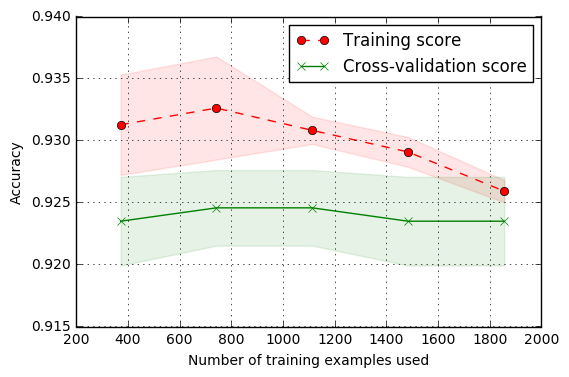

In [54]:
draw_learning_curve(best_log, X_train_std, y_train, scoring='accuracy', cv=cv);

For this, it appears my coefficients were not as strong as I intended; however, my actual intuition tells me the regression test itself given the sample size of my data might lead to some inconsistent results with respect to strength. You might notice the sequence of my code runs higher than the number of code blocks you see. That is the result of my testing the code and model a few times to elicit some semblance of consistenc response. 

With that, I do think with two features like `Trump_Win` and `Obama_Win` that are as strong correlated in my `sherlock_holmes`.corr() code, and the low number of observations to begin with, I might be risking some overfitting and/or not exposing myself to newer features. 

What I now intend to explore, is choosing some features that I would like to train against a `Trump_Win`, to perhaps better understand some of the conditions that made his election more likely than not.

In [72]:
feature_cols = ['Whiter_County', 'Rural_County', 'Undereducated_County', 'Turnout_Increase'] 
X = sherlock_holmes[feature_cols]
y = sherlock_holmes['Trump_Win']

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [74]:
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=4, test_size=0.2)

In [75]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [76]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=10)

In [77]:
logreg.fit(X_train_std, y_train)
zip(feature_cols, logreg.coef_[0])

[('Whiter_County', 0.73714023922040828),
 ('Rural_County', 0.38366727780003107),
 ('Undereducated_County', 0.12467814171337319),
 ('Turnout_Increase', 0.34877837645056087)]

In [78]:
y_pred_class = logreg.predict(X_test_std)

In [79]:
from sklearn import metrics
print metrics.accuracy_score(y_test, y_pred_class)

0.848837209302


In [80]:
from sklearn.model_selection import GridSearchCV
parameters = {'C': np.linspace(1e-5, 1e5, 100), 'class_weight': [None, 'balanced']}
logreg2 = LogisticRegression()           
clf = GridSearchCV(logreg2, parameters, cv=cv)
clf.fit(X_train_std, y_train)

GridSearchCV(cv=ShuffleSplit(n_splits=4, random_state=None, test_size=0.2, train_size=None),
       error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': array([  1.00000e-05,   1.01010e+03, ...,   9.89899e+04,   1.00000e+05]), 'class_weight': [None, 'balanced']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [81]:
clf.best_params_

{'C': 1.0000000000000001e-05, 'class_weight': None}

In [82]:
clf.best_score_

0.84536637931034486

In [83]:
best_log = clf.best_estimator_

In [84]:
best_log.score(X_test_std, y_test)

0.84883720930232553

In [85]:
X_train.tail(10)

,Whiter_County,Rural_County,Undereducated_County,Turnout_Increase
661,1,1,0,1
5397,0,0,0,1
5664,0,1,1,1
569,0,0,1,1
757,0,1,0,1
3717,0,0,0,1
5466,0,0,0,1
5919,0,0,0,1
5433,1,0,0,1
5316,1,1,0,1


In [86]:
pd.DataFrame({'features': X.columns, 'coefficients': best_log.coef_[0]})

,coefficients,features
0,0.001519,Whiter_County
1,0.000949,Rural_County
2,0.000033,Undereducated_County
3,0.000909,Turnout_Increase


In [87]:
import matplotlib.pyplot as plt
from sk_modelcurves.learning_curve import draw_learning_curve
%matplotlib inline

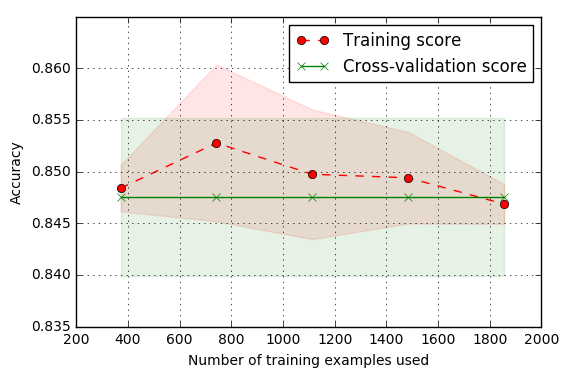

In [88]:
draw_learning_curve(best_log, X_train_std, y_train, scoring='accuracy', cv=cv);

What is interesting here is my Cross-validation score is totally flat, leaving me to believe there was entirely too much overfitting. My intition tells me that I need to then reduce down my features, or introduce some new ones as a whole replacing those which might be highly correlated with one another. 

In [89]:
feature_cols = ['Whiter_County', 'Undereducated_County'] 
X = sherlock_holmes[feature_cols]
y = sherlock_holmes['Trump_Win']

In [90]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [91]:
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=4, test_size=0.2)

In [92]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [93]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=10)

In [94]:
logreg.fit(X_train_std, y_train)
zip(feature_cols, logreg.coef_[0])

[('Whiter_County', 0.72435932156214267),
 ('Undereducated_County', 0.1581138452299648)]

In [95]:
y_pred_class = logreg.predict(X_test_std)

In [96]:
from sklearn import metrics
print metrics.accuracy_score(y_test, y_pred_class)

0.846253229974


In [97]:
from sklearn.model_selection import GridSearchCV
parameters = {'C': np.linspace(1e-5, 1e5, 100), 'class_weight': [None, 'balanced']}
logreg2 = LogisticRegression()           
clf = GridSearchCV(logreg2, parameters, cv=cv)
clf.fit(X_train_std, y_train)

GridSearchCV(cv=ShuffleSplit(n_splits=4, random_state=None, test_size=0.2, train_size=None),
       error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': array([  1.00000e-05,   1.01010e+03, ...,   9.89899e+04,   1.00000e+05]), 'class_weight': [None, 'balanced']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [98]:
clf.best_params_

{'C': 1.0000000000000001e-05, 'class_weight': None}

In [99]:
clf.best_score_

0.8399784482758621

In [100]:
best_log = clf.best_estimator_

In [101]:
best_log.score(X_test_std, y_test)

0.84625322997416019

In [102]:
X_train.tail(10)

,Whiter_County,Undereducated_County
6873,0,0
8116,1,0
8999,0,1
6132,1,0
3263,0,1
6774,0,1
3642,1,1
5829,1,0
587,0,0
5103,0,0


In [103]:
pd.DataFrame({'features': X.columns, 'coefficients': best_log.coef_[0]})

,coefficients,features
0,0.001434,Whiter_County
1,0.000226,Undereducated_County


In [104]:
import matplotlib.pyplot as plt
from sk_modelcurves.learning_curve import draw_learning_curve
%matplotlib inline

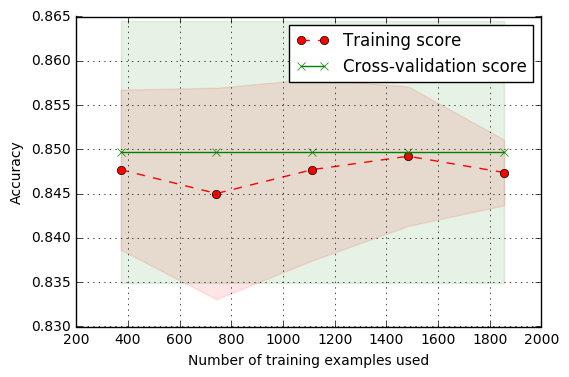

In [105]:
draw_learning_curve(best_log, X_train_std, y_train, scoring='accuracy', cv=cv);

Similar issue here, even with a feature reduction. Now, I will try to reduce it to just one feature. 

In [157]:
feature_cols = ['Turnout_Increase'] 
X = sherlock_holmes[feature_cols]
y = sherlock_holmes['Trump_Win']

In [158]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [159]:
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=4, test_size=0.2)

In [160]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [161]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=10)

In [162]:
logreg.fit(X_train_std, y_train)
zip(feature_cols, logreg.coef_[0])

[('Turnout_Increase', 0.33828151073597368)]

In [163]:
y_pred_class = logreg.predict(X_test_std)

In [164]:
from sklearn import metrics
print metrics.accuracy_score(y_test, y_pred_class)

0.830749354005


In [165]:
from sklearn.model_selection import GridSearchCV
parameters = {'C': np.linspace(1e-5, 1e5, 100), 'class_weight': [None, 'balanced']}
logreg2 = LogisticRegression()           
clf = GridSearchCV(logreg2, parameters, cv=cv)
clf.fit(X_train_std, y_train)

GridSearchCV(cv=ShuffleSplit(n_splits=4, random_state=None, test_size=0.2, train_size=None),
       error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': array([  1.00000e-05,   1.01010e+03, ...,   9.89899e+04,   1.00000e+05]), 'class_weight': [None, 'balanced']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [166]:
clf.best_params_

{'C': 1.0000000000000001e-05, 'class_weight': None}

In [167]:
clf.best_score_

0.86045258620689657

In [168]:
best_log = clf.best_estimator_

In [169]:
best_log.score(X_test_std, y_test)

0.83074935400516792

In [170]:
X_train.tail(10)

,Turnout_Increase
3948,0
6672,1
3867,1
8367,0
6789,1
4887,1
549,1
1789,0
287,1
1957,0


In [171]:
pd.DataFrame({'features': X.columns, 'coefficients': best_log.coef_[0]})

,coefficients,features
0,0.001038,Turnout_Increase


In [172]:
import matplotlib.pyplot as plt
from sk_modelcurves.learning_curve import draw_learning_curve
%matplotlib inline

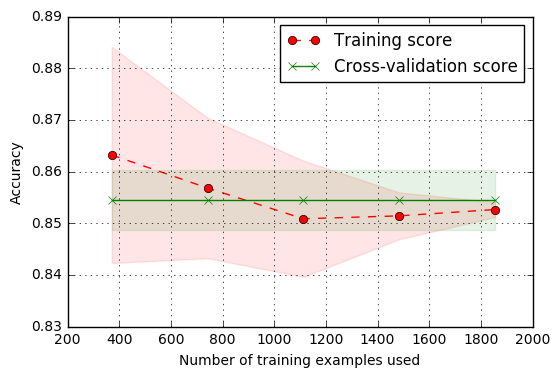

In [173]:
draw_learning_curve(best_log, X_train_std, y_train, scoring='accuracy', cv=cv);

My thinking here is I am overfitting on the cross-validation level if it continues to remain flat, which it has given the number of iterations I've thrown at the model. The possibility here is that there is a likelihood the logistic regression model may not be the best fit here because of how correlated some of these features might be here. 

Let's try a random forest model which might, hopefully, help reduce the overfitting that seems to be prone to the logistic regression model.  

In [180]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

X = sherlock_holmes[['Huge_Price_Swing', 'Obama_Win', 'Trump_Win', 'Whiter_County', 'Educated_County', 'Turnout_Increase']].dropna()
y = X['Trump_Win']
X.drop('Trump_Win', axis=1, inplace=True)
    
model.fit(X, y)

from sklearn.tree import export_graphviz
from os import system 
def build_tree_image(model):
    dotfile = open("tree.dot", 'w')
    export_graphviz(model,
                              out_file = dotfile,
                              feature_names = X.columns)
    dotfile.close()
    system("dot -Tpng tree.dot -o tree.png")
    
build_tree_image(model)

In [181]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, scoring='roc_auc', cv=10)
print('CV AUC {}, Average AUC {}'.format(scores, scores.mean()))

CV AUC [ 0.93765843  0.97841413  0.98408316  0.9787234   0.93324671  0.98420497
  0.94688972  0.97178009  0.9874127   0.86677765], Average AUC 0.956919096202


In [182]:
model = DecisionTreeClassifier(
                max_depth = 4,
                min_samples_leaf = 10)

model.fit(X, y)
build_tree_image(model)

In [183]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 20)
    
model.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=20, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [184]:
features = X.columns
feature_importances = model.feature_importances_

features_df = pd.DataFrame({'Features': features, 'Importance Score': feature_importances})
features_df.sort_values('Importance Score', inplace=True, ascending=False)

features_df.head(10)

,Features,Importance Score
1,Obama_Win,0.815060
3,Educated_County,0.114795
2,Whiter_County,0.033616
4,Turnout_Increase,0.019695
0,Huge_Price_Swing,0.016834


Unsurprisingly, it looks like the `Obama_Win` feature, again, is a strong indicator of a `Trump_Win`. Let's pretend we are now not looking at whether Obama won the county, and whether knowing, as the Hillary Clinton campaign might've expected, a huge ACA on marketplace price swing and an increase in turnout for what they all dubbed an historic election. Specifically here, let's see if the random forest can learn a county that Trump will end up flipping from Obama to himself, causing Clinton a loss of counties and potentially, the election.

In [185]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

X = sherlock_holmes[['Huge_Price_Swing', 'Trump_Flip', 'Turnout_Increase']].dropna()
y = X['Trump_Flip']
X.drop('Trump_Flip', axis=1, inplace=True)
    
model.fit(X, y)

from sklearn.tree import export_graphviz
from os import system 
def build_tree_image(model):
    dotfile = open("tree.dot", 'w')
    export_graphviz(model,
                              out_file = dotfile,
                              feature_names = X.columns)
    dotfile.close()
    system("dot -Tpng tree.dot -o tree.png")
    
build_tree_image(model)

In [186]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, scoring='roc_auc', cv=10)
print('CV AUC {}, Average AUC {}'.format(scores, scores.mean()))

CV AUC [ 0.64520202  0.70075758  0.6740846   0.4397096   0.51515152  0.66587753
  0.52929997  0.65790307  0.73394724  0.71428571], Average AUC 0.627621882086


In [187]:
model = DecisionTreeClassifier(
                max_depth = 4,
                min_samples_leaf = 10)

model.fit(X, y)
build_tree_image(model)

In [188]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 20)
    
model.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=20, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [189]:
features = X.columns
feature_importances = model.feature_importances_

features_df = pd.DataFrame({'Features': features, 'Importance Score': feature_importances})
features_df.sort_values('Importance Score', inplace=True, ascending=False)

features_df.head(10)

,Features,Importance Score
1,Turnout_Increase,0.959275
0,Huge_Price_Swing,0.040725


And again, `Huge_Price_Swing` still does not appear to have a strong level of importance for a county's outcome.

And as it turns out, as it were, a turnout increase does not seem to have helped the Clinton campaign, though the intuition during the election was that an increase in turnout would actually help the Clinton campaign, and that Trump was looking to suppress the vote. Perhaps there is a bit more to the story here? 

Looking at the correlated file, the `Huge_Price_Swing` and `Turnout_Increase` had a score of 0.020746 -- this is quite low. 

My intuition and my work here suggests there truly is no easy, clear-cut analysis of the election with respect to counties that Trump could flip, did flip, did win, and/or Hillary will lose. Some of it is a function of my analysis as a whole, though future features I would like to incorporate is some work around predicting the winning and losing percentage of each candidate, with some more fine-tuned feature engineering. Or perhaps as Nate Silver himself might caution: politics is a game of probability. Maybe it really is just a coin toss. 